# Group Project Report: How do Song Statistics and Other Musical Elements Correlate to the Number of Spotify Streams?
#### Xuyang Chen, Rachel Weng, Martin Wong, Seabert Yuan
## Introduction
Spotify is a digital music streaming service that allows users to access millions of songs on various devices, including computers, phones, and cars. As of 2024, Spotify is documented as the world’s most popular streaming service, with 350 million active users and 150 million premium subscribers. [(Source)](https://www.cnn.com/cnn-underscored/reviews/best-music-streaming-service#:~:text=Spotify%20is%20the%20most%20popular,users%20and%20150%20million%20subscribers.)

Our project aims to answer the following question: ***How do song statistics and other musical elements correlate to the number of Spotify streams?***

The dataset, from [(Kaggle)](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data), documents the most streamed Spotify songs globally of 2023 obtained using the Spotify API and provides an abundance of information about both the song’s background and musicality. A stream is defined as a user listening to a song for more than 30 seconds. The dataset also provides percentage values from a range of 0 - 100 % of danceability, defined as a track’s suitability for dancing based on musical factors such as tempo, beat strength, rhythmic stability, and overall regularity.

# Methods and Results

### Preliminary Exploratory Data Analysis

An exploration into the relationships between various variables and the number of Spotify streams will be expored to determine which variables should be used as predictors for our regression model. We begin by importing the necessary libraries.

In [1]:
library(tidyverse)
library(tidymodels)
library(reshape2)
library(repr)
options(repr.matrix.max.rows = 8)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Reading the Data from the web Into R

After uploading our onto github, it can be read using R's `read_csv()` function.

In [2]:
spotify_data <- read_csv("https://raw.githubusercontent.com/martin0wong/dsci100_project/main/data/spotify-2023.csv")
spotify_data

Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deezer_playlists, in_shazam_charts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


track_name                          artist(s)_name     artist_count
1   Seven (feat. Latto) (Explicit Ver.) Latto, Jung Kook   2           
2   LALA                                Myke Towers        1           
3   vampire                             Olivia Rodrigo     1           
4   Cruel Summer                        Taylor Swift       1           
⋮   ⋮                                   ⋮                  ⋮           
950 Bigger Than The Whole Sky           Taylor Swift       1           
951 A Veces (feat. Feid)                Feid, Paulo Londra 2           
952 En La De Ella                       Feid, Sech, Jhayco 3           
953 Alone                               Burna Boy          1           
    released_year released_month released_day in_spotify_playlists
1   2023          7              14            553                
2   2023          3              23           1474                
3   2023          6              30           1397                
4   2019          8              23           7858                
⋮   ⋮             ⋮              ⋮            ⋮                   
950 2022          10             21           1180                
951 2022          11              3            573                
952 2022          10             20           1320                
953 2022          11              4            782                
    in_spotify_charts streams   in_apple_playlists ⋯ bpm key mode 
1   147               141381703  43                ⋯ 125 B   Major
2    48               133716286  48                ⋯  92 C#  Major
3   113               140003974  94                ⋯ 138 F   Major
4   100               800840817 116                ⋯ 170 A   Major
⋮   ⋮                 ⋮         ⋮                  ⋱ ⋮   ⋮   ⋮    
950 0                 121871870  4                 ⋯ 166 F#  Major
951 0                 73513683   2                 ⋯  92 C#  Major
952 0                 133895612 29                 ⋯  97 C#  Major
953 2                 96007391  27                 ⋯  90 E   Minor
    danceability_% valence_% energy_% acousticness_% instrumentalness_%
1   80             89        83       31             0                 
2   71             61        74        7             0                 
3   51             32        53       17             0                 
4   55             58        72       11             0                 
⋮   ⋮              ⋮         ⋮        ⋮              ⋮                 
950 42              7        24       83             1                 
951 80             81        67        4             0                 
952 82             67        77        8             0                 
953 61             32        67       15             0                 
    liveness_% speechiness_%
1    8          4           
2   10          4           
3   31          6           
4   11         15           
⋮   ⋮          ⋮            
950 12         6            
951  8         6            
952 12         5            
953 11         5

### Cleaning and Wrangling

Generally, the data is tidy. We can however, change the names of the columns for clarity and ensure that each column is using the right data type. Since the `released_` columns do not mean too much for us, we convert them into the number of days from the release day until December 31, 2023 inclusive. This value, calculated by using average days in a year and in a month, gives the number of days the song has been released for. We will then remove any observations that contain missing data as observations missing data may impact correlations within other variables. Finally, we will only select columns useful for visualization dropping columns such as the `track_name` or the `artist(s)_name`.

In [3]:
colnames(spotify_data) <- c("track_name", "artist(s)_name", "artist_count", "released_year", "released_month", "released_day", 
                                    "in_spotify_playlists", "in_spotify_charts", "streams", "in_apple_playlists", "in_apple_charts", 
                                    "in_deezer_playlists", "in_deezer_charts", "in_shazam_charts", "bpm", "key", "mode", 
                                    "danceability_percent", "valence_percent", "energy_percent", 
                                    "acousticness_percent", "instrumentalness_percent", "liveness_percent", "speechiness_percent")
spotify_data_wrangled <- spotify_data |>
                         mutate(key = as.factor(key)) |>
                         mutate(mode = as.factor(mode)) |>
                         #avg days in a year/month searched from web
                         mutate(days_released = round((2023-released_year)*365.25 + (12-released_month)*30.436875 + (30.436875-released_day), 0)) |>
                         mutate(across(streams:bpm, as.numeric)) |>
                         mutate(streams = streams/1000000) |>
                         drop_na() |>
                         #removing released_xxx columns as wrangled into days_released
                         select(track_name:artist_count, in_spotify_playlists:days_released)
spotify_data_wrangled

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(streams:bpm, as.numeric)`.
Caused by warning:
! NAs introduced by coercion”


track_name                          artist(s)_name     artist_count
1   Seven (feat. Latto) (Explicit Ver.) Latto, Jung Kook   2           
2   LALA                                Myke Towers        1           
3   vampire                             Olivia Rodrigo     1           
4   Cruel Summer                        Taylor Swift       1           
⋮   ⋮                                   ⋮                  ⋮           
813 Bigger Than The Whole Sky           Taylor Swift       1           
814 A Veces (feat. Feid)                Feid, Paulo Londra 2           
815 En La De Ella                       Feid, Sech, Jhayco 3           
816 Alone                               Burna Boy          1           
    in_spotify_playlists in_spotify_charts streams   in_apple_playlists
1    553                 147               141.3817   43               
2   1474                  48               133.7163   48               
3   1397                 113               140.0040   94               
4   7858                 100               800.8408  116               
⋮   ⋮                    ⋮                 ⋮         ⋮                 
813 1180                 0                 121.87187  4                
814  573                 0                  73.51368  2                
815 1320                 0                 133.89561 29                
816  782                 2                  96.00739 27                
    in_apple_charts in_deezer_playlists in_deezer_charts ⋯ key mode 
1   263              45                 10               ⋯ B   Major
2   126              58                 14               ⋯ C#  Major
3   207              91                 14               ⋯ F   Major
4   207             125                 12               ⋯ A   Major
⋮   ⋮               ⋮                   ⋮                ⋱ ⋮   ⋮    
813  0               8                  0                ⋯ F#  Major
814  0               7                  0                ⋯ C#  Major
815 26              17                  0                ⋯ C#  Major
816 18              32                  1                ⋯ E   Minor
    danceability_percent valence_percent energy_percent acousticness_percent
1   80                   89              83             31                  
2   71                   61              74              7                  
3   51                   32              53             17                  
4   55                   58              72             11                  
⋮   ⋮                    ⋮               ⋮              ⋮                   
813 42                    7              24             83                  
814 80                   81              67              4                  
815 82                   67              77              8                  
816 61                   32              67             15                  
    instrumentalness_percent liveness_percent speechiness_percent days_released
1   0                         8                4                   169         
2   0                        10                4                   281         
3   0                        31                6                   183         
4   0                        11               15                  1590         
⋮   ⋮                        ⋮                ⋮                   ⋮            
813 1                        12               6                   436          
814 0                         8               6                   423          
815 0                        12               5                   437          
816 0                        11               5                   422

### Exploratory Data Analysis

First we set the seed for reproducibility. We will split the wrangled data such that 75% of the data will be used for training and the remaining 25% for testing. Then we summarize our data showing the average values for a certain bpm.

In [4]:
set.seed(15)
spotify_split <- initial_split(spotify_data_wrangled, prop = 0.75, strata = streams)
spotify_train <- training(spotify_split)
spotify_test <- testing(spotify_split)

spotify_summary <- merge(spotify_train |> group_by(bpm) |> summarize(across(in_spotify_playlists:in_apple_charts ,mean)),
                         spotify_train |> group_by(bpm) |> summarize(across(danceability_percent:days_released ,mean)))
spotify_summary <- merge(spotify_summary, spotify_train |> group_by(bpm) |> summarize(count = n()) |> arrange(bpm) |> select(bpm,count))
spotify_summary

bpm in_spotify_playlists in_spotify_charts streams   in_apple_playlists
1   65  1127                  0                110.84905 16                
2   67  3408                 47                518.74511 87                
3   71   461                  0                 94.61649  7                
4   72  1480                  0                 61.73984  1                
⋮   ⋮   ⋮                    ⋮                 ⋮         ⋮                 
112 198 3506                 56                373.2000  105               
113 202 8879                  0                663.8321  182               
114 204 2420                 19                429.8298   52               
115 206 8448                 23                882.8312  160               
    in_apple_charts danceability_percent valence_percent energy_percent
1   63              71                   55              26            
2   86              53                   50              53            
3   11              59                   70              74            
4    0              56                   56              47            
⋮   ⋮               ⋮                    ⋮               ⋮             
112  64             59                   71              42            
113 107             24                   76              60            
114 107             52                   52              68            
115 110             43                   50              55            
    acousticness_percent instrumentalness_percent liveness_percent
1   85                   0                        13              
2   23                   0                        44              
3   56                   0                        11              
4   76                   0                         8              
⋮   ⋮                    ⋮                        ⋮               
112 55                   0                        10              
113 77                   0                        12              
114 46                   0                        15              
115 50                   0                        15              
    speechiness_percent days_released count
1    8                  387           1    
2    7                  311           1    
3   40                  667           1    
4   36                  596           1    
⋮   ⋮                   ⋮             ⋮    
112  7                    394         1    
113  4                  21992         1    
114  4                    334         1    
115 10                   4382         1

With our training data, we can visualize how each predictor affects the number of Spotify streams.

In [5]:
spotify_charts <- spotify_train |>
                  select(in_spotify_charts, in_apple_charts, streams)
spotify_playlists <- spotify_train |>
                  select(in_spotify_playlists, in_apple_playlists, streams)
spotify_music <- spotify_train |>
                 select(bpm, days_released, danceability_percent, streams)

We first add the cowplot library to combine all plots with each column on the x-axis and the number of streams on Spotify on the y-axis to visualize how relevant certain variables are on the number of streams.

In [6]:
library(cowplot)

spotify_charts_plot <- spotify_charts |>
                        ggplot(aes(x= in_spotify_charts, y=streams)) +
                        labs(x = "Number of occurrences in Spotify charts", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
apple_charts_plot <- spotify_charts |>
                        ggplot(aes(x=in_apple_charts, y=streams)) +
                        labs(x = "Number of occurrences in Apple charts", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
charts_title <- ggdraw() + draw_label("Number of Spotify Streams Compared to Track Appearances on Various Platforms' Charts", fontface='bold')
charts_plots <- plot_grid(spotify_charts_plot, apple_charts_plot, ncol=2)
charts_plot <- plot_grid(charts_title, charts_plots, ncol=1, rel_heights=c(0.1, 1))

Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [7]:
spotify_playlists_plot <- spotify_playlists |>
                        ggplot(aes(x=in_spotify_playlists, y=streams)) +
                        labs(x = "Number of occurrences in Spotify playlists", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
apple_playlists_plot <- spotify_playlists |>
                        ggplot(aes(x=in_apple_playlists, y=streams)) +
                        labs(x = "Number of occurrences in Apple playlists", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
playlists_title <- ggdraw() + draw_label("Number of Spotify Streams Compared to Track Appearances on Various Platforms' Playlists", fontface='bold')
playlists_plots <- plot_grid(spotify_playlists_plot, apple_playlists_plot, ncol=2)
playlists_plot <- plot_grid(playlists_title, playlists_plots, ncol=1, rel_heights=c(0.1, 1))

In [8]:
bpm_plot <- spotify_music |>
                        ggplot(aes(x=bpm, y=streams)) +
                        labs(x = "Track's Beats per Minute (BPM)", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
released_plot <- spotify_music |>
                        ggplot(aes(x=days_released, y=streams)) +
                        labs(x = "Days Since Release", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
danceability_plot <- spotify_music |>
                        ggplot(aes(x=danceability_percent, y=streams)) +
                        labs(x = "Percent Describing the Track's Danceability (%)", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
track_title <- ggdraw() + draw_label("Number of Spotify Streams Compared to Track's Various Properties", fontface='bold')
track_plots <- plot_grid(bpm_plot, released_plot, danceability_plot, ncol=3)
track_plot <- plot_grid(track_title, track_plots, ncol=1, rel_heights=c(0.1, 1))

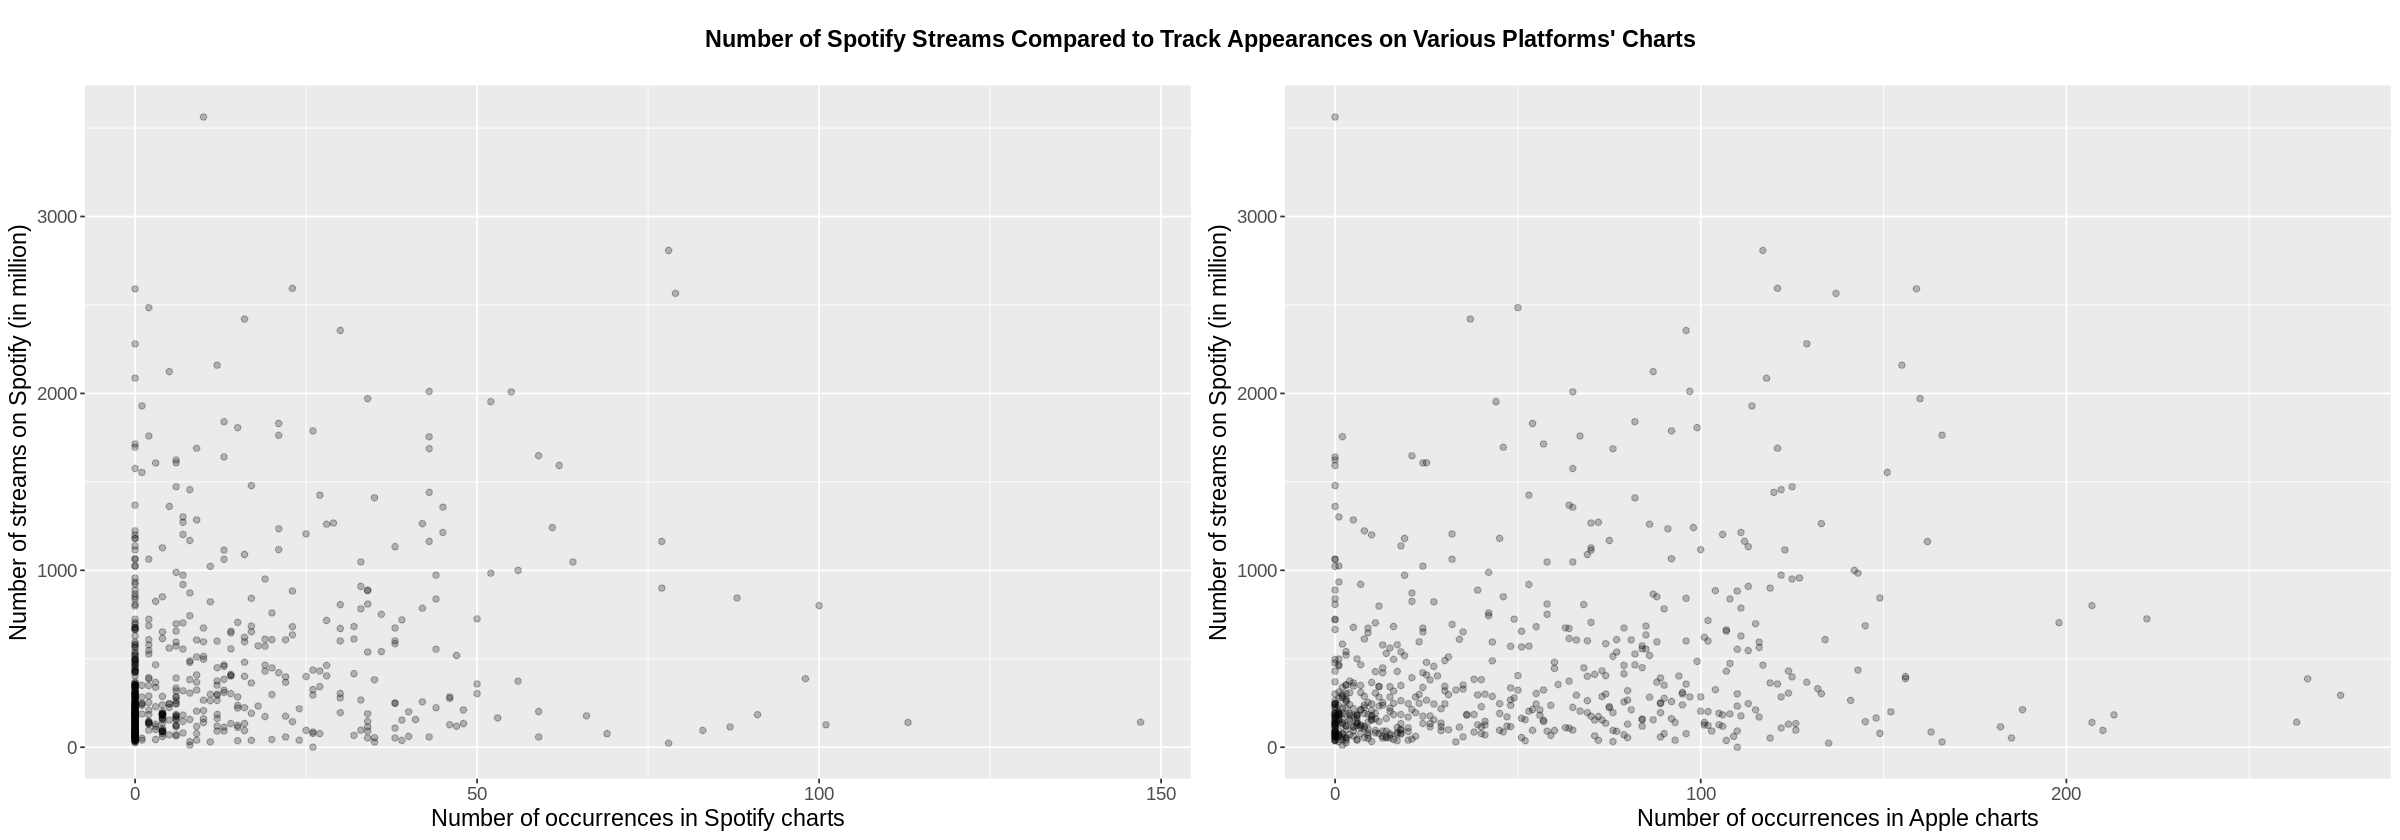

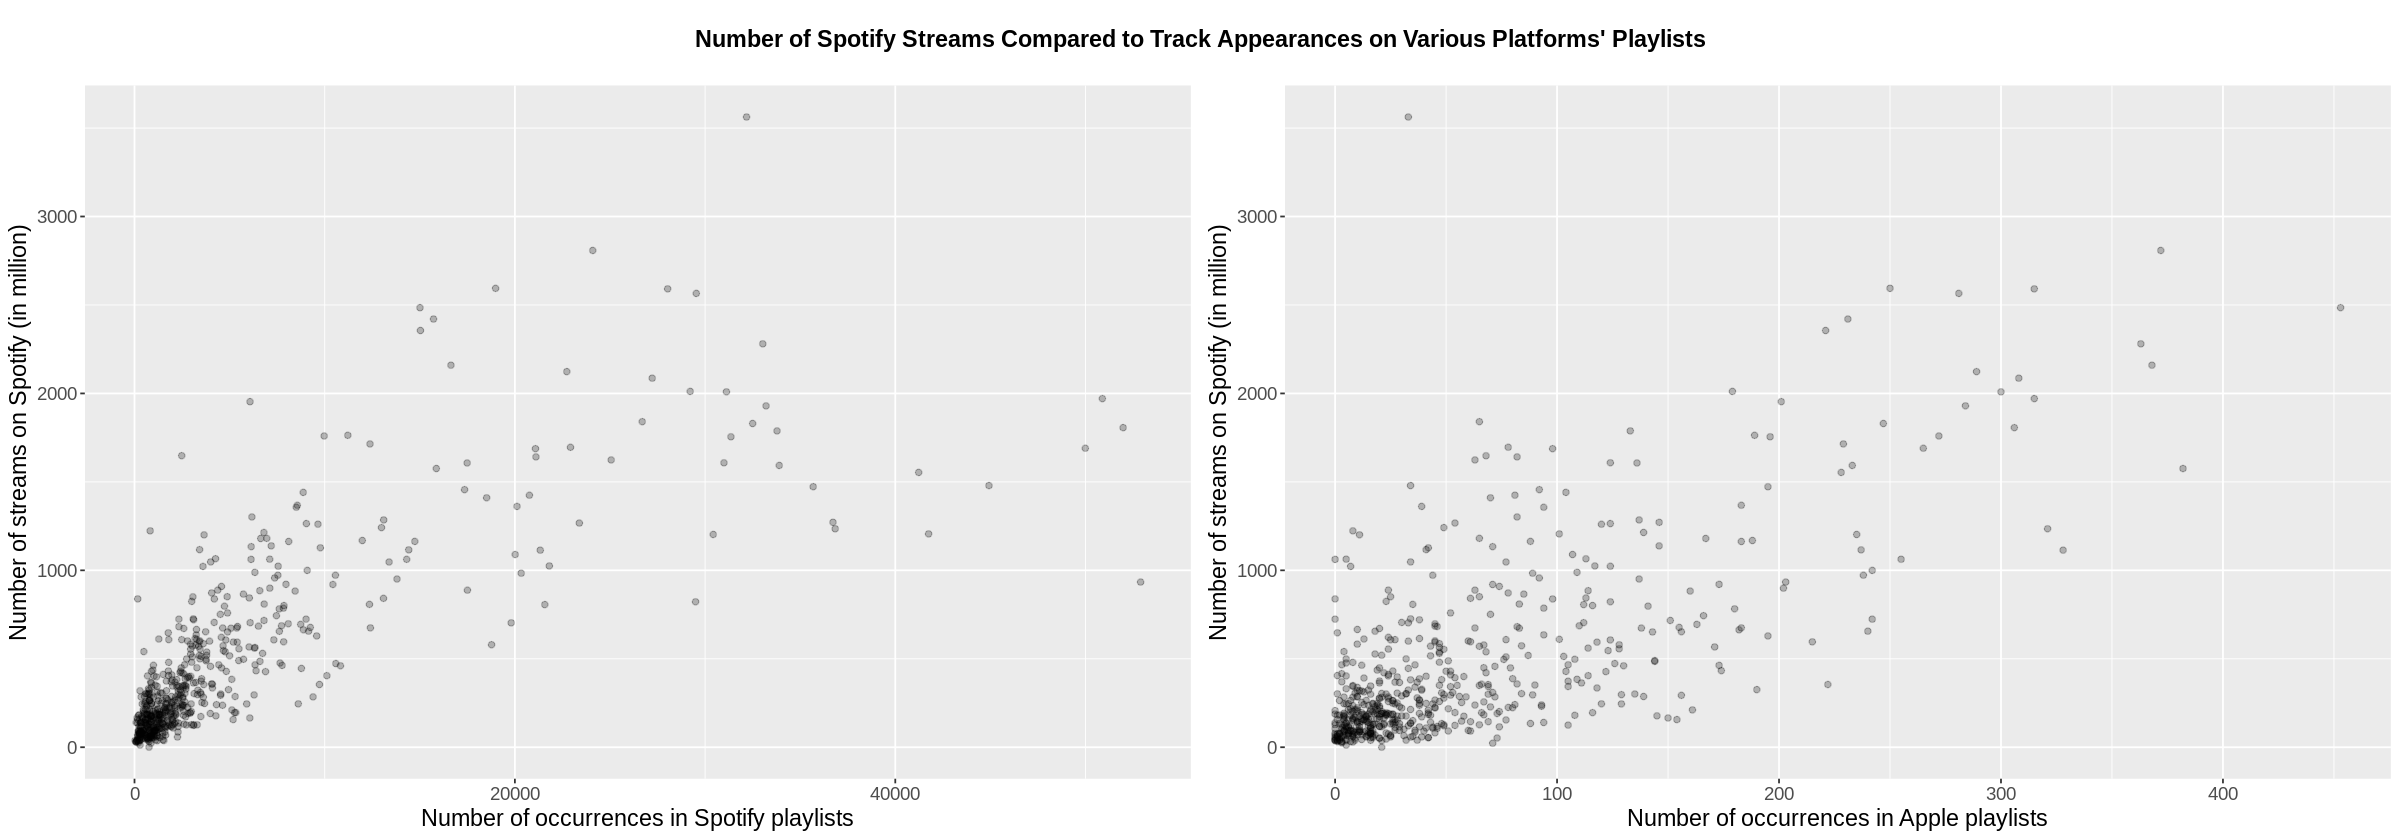

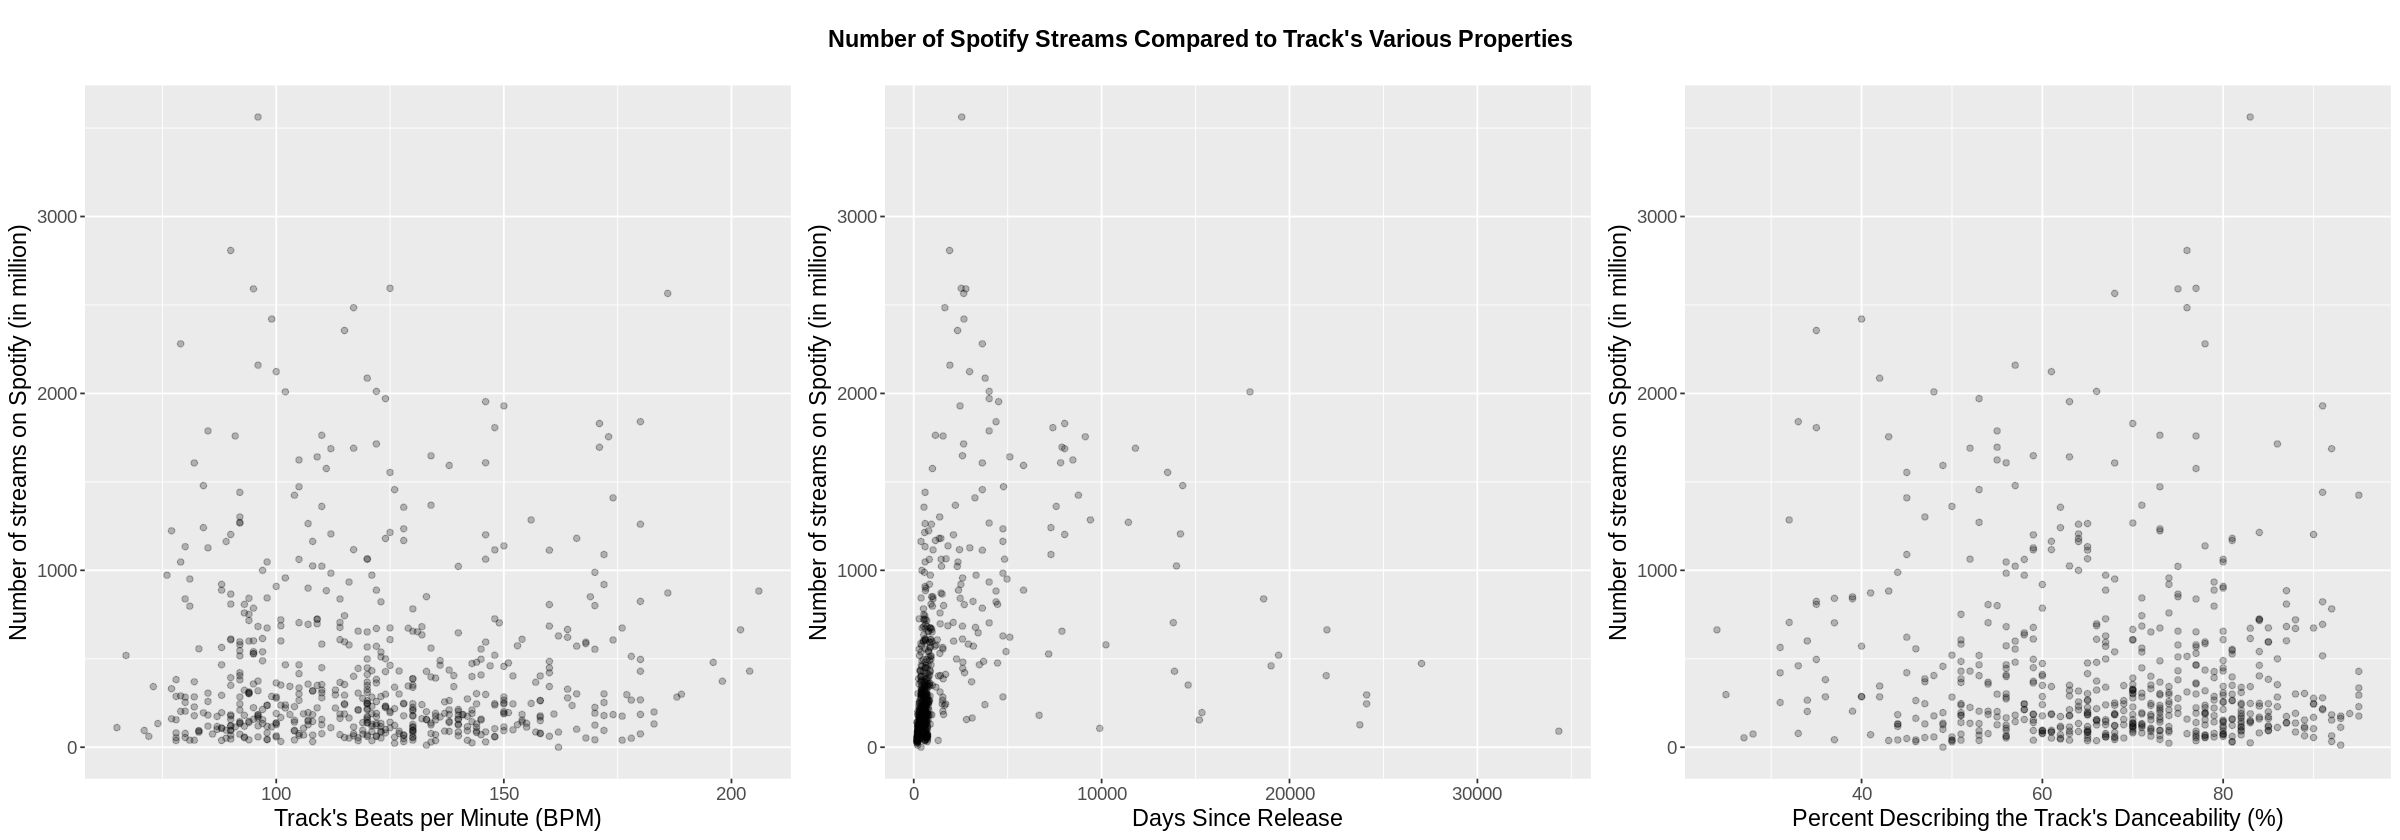

In [9]:
options(repr.plot.height = 7, repr.plot.width = 20)
charts_plot
playlists_plot
track_plot

## Data Analysis

### 1. Number of occurrences in Spotify charts vs Streams

In [10]:
Spotify_charts_recipe <- recipe(streams ~ in_spotify_charts, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Spotify_charts_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

Spotify_charts_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

Spotify_charts_wkflw <- workflow() |>
  add_recipe(Spotify_charts_recipe) |>
  add_model(Spotify_charts_spec)

Spotify_charts_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [11]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
Spotify_charts_results <- Spotify_charts_wkflw |>
  tune_grid(resamples = Spotify_charts_vfold, grid = gridvals) |>
  collect_metrics()
Spotify_charts_results

Spotify_charts_min <- Spotify_charts_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
Spotify_charts_min

neighbors .metric .estimator mean         n std_err    
1   1        rmse    standard   676.95167945 5 54.05829068
2   1        rsq     standard     0.02654530 5  0.01293213
3  11        rmse    standard   540.46213886 5 32.45893730
4  11        rsq     standard     0.06207142 5  0.01756557
⋮  ⋮         ⋮       ⋮          ⋮            ⋮ ⋮          
19  91       rmse    standard   518.85371332 5 30.11546121
20  91       rsq     standard     0.05963157 5  0.01490251
21 101       rmse    standard   517.19882986 5 30.23222310
22 101       rsq     standard     0.06057351 5  0.01554539
   .config              
1  Preprocessor1_Model01
2  Preprocessor1_Model01
3  Preprocessor1_Model02
4  Preprocessor1_Model02
⋮  ⋮                    
19 Preprocessor1_Model10
20 Preprocessor1_Model10
21 Preprocessor1_Model11
22 Preprocessor1_Model11

neighbors .metric .estimator mean     n std_err  .config              
1 41        rmse    standard   526.8468 5 28.62963 Preprocessor1_Model05

In [12]:
k_Spotify_charts_min <- Spotify_charts_min |>
         pull(neighbors)

Spotify_charts_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_Spotify_charts_min) |>
         set_engine("kknn") |>
         set_mode("regression")

Spotify_charts_best_fit <- workflow() |>
         add_recipe(Spotify_charts_recipe) |>
         add_model(Spotify_charts_best_spec) |>
         fit(data = spotify_train)

Spotify_charts_summary <- Spotify_charts_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
Spotify_charts_summary

Spotify_charts_preds <- Spotify_charts_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
Spotify_charts_preds

.metric .estimator .estimate   
1 rmse    standard   572.83425337
2 rsq     standard     0.05670682
3 mae     standard   380.15140984

.pred    track_name          artist(s)_name                          
1   679.8766 LALA                Myke Towers                             
2   607.7111 Columbia            Quevedo                                 
3   716.3659 fukumean            Gunna                                   
4   631.3080 LADY GAGA           Gabito Ballesteros, Junior H, Peso Pluma
⋮   ⋮        ⋮                   ⋮                                       
609 179.0096 Sweet Child O' Mine Guns N' Roses                           
610 552.0848 Heartless           Kanye West                              
611 432.1306 Bound 2             Kanye West                              
612 488.2591 The Scientist       Coldplay                                
    artist_count in_spotify_playlists in_spotify_charts streams  
1   1            1474                 48                133.71629
2   1             714                 43                 58.14938
3   1            1096                 83                 95.21731
4   3             332                 26                 86.44484
⋮   ⋮            ⋮                    ⋮                 ⋮        
609 1            41231                 1                1553.4980
610 1            17504                34                 887.9061
611 1            19806                 7                 703.3017
612 1            30992                 6                1608.1643
    in_apple_playlists in_apple_charts in_deezer_playlists ⋯ key mode 
1   48                 126             58                  ⋯ C#  Major
2   25                  89             30                  ⋯ F   Major
3   60                 210             48                  ⋯ C#  Minor
4   11                 163             10                  ⋯ F   Minor
⋮   ⋮                  ⋮               ⋮                   ⋱ ⋮   ⋮    
609 228                151             6720                ⋯ F#  Major
610  63                 39             1315                ⋯ A#  Minor
611  33                 11              274                ⋯ C#  Major
612 124                 25             7827                ⋯ F   Major
    danceability_percent valence_percent energy_percent acousticness_percent
1   71                   61              74              7                  
2   67                   26              71             37                  
3   85                   22              62             12                  
4   65                   87              74             22                  
⋮   ⋮                    ⋮               ⋮              ⋮                   
609 45                   67              90              9                  
610 79                   66              65              5                  
611 37                   28              66             14                  
612 56                   21              44             73                  
    instrumentalness_percent liveness_percent speechiness_percent days_released
1   0                        10               4                   281          
2   0                        11               4                   176          
3   0                        28               9                   228          
4   0                        42               4                   191          
⋮   ⋮                        ⋮                ⋮                   ⋮            
609 11                       10                5                  13513        
610  0                       25               14                   5843        
611  0                        9                5                   4017        
612  0                       11                2                   7817

## 2. Number of occurrences in Apple charts

In [13]:
Apple_charts_recipe <- recipe(streams ~ in_apple_charts, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Apple_charts_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

Apple_charts_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

Apple_charts_wkflw <- workflow() |>
  add_recipe(Apple_charts_recipe) |>
  add_model(Apple_charts_spec)

Apple_charts_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [14]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
Apple_charts_results <- Apple_charts_wkflw |>
  tune_grid(resamples = Apple_charts_vfold, grid = gridvals) |>
  collect_metrics()
Apple_charts_results

Apple_charts_min <- Apple_charts_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
Apple_charts_min

neighbors .metric .estimator mean         n std_err    
1   1        rmse    standard   631.62158561 5 34.75900476
2   1        rsq     standard     0.02291555 5  0.01243240
3  11        rmse    standard   519.73923670 5 27.63623709
4  11        rsq     standard     0.05207582 5  0.01587906
⋮  ⋮         ⋮       ⋮          ⋮            ⋮ ⋮          
19  91       rmse    standard   493.13208623 5 28.02054218
20  91       rsq     standard     0.07002837 5  0.01823935
21 101       rmse    standard   492.91382723 5 28.05335634
22 101       rsq     standard     0.06962602 5  0.01679443
   .config              
1  Preprocessor1_Model01
2  Preprocessor1_Model01
3  Preprocessor1_Model02
4  Preprocessor1_Model02
⋮  ⋮                    
19 Preprocessor1_Model10
20 Preprocessor1_Model10
21 Preprocessor1_Model11
22 Preprocessor1_Model11

neighbors .metric .estimator mean    n std_err  .config              
1 51        rmse    standard   498.699 5 27.08783 Preprocessor1_Model06

In [15]:
k_Apple_charts_min <- Apple_charts_min |>
         pull(neighbors)

Apple_charts_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_Apple_charts_min) |>
         set_engine("kknn") |>
         set_mode("regression")

Apple_charts_best_fit <- workflow() |>
         add_recipe(Apple_charts_recipe) |>
         add_model(Apple_charts_best_spec) |>
         fit(data = spotify_train)

Apple_charts_summary <- Apple_charts_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
Apple_charts_summary

Apple_charts_preds <- Apple_charts_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
Apple_charts_preds

.metric .estimator .estimate   
1 rmse    standard   530.56873964
2 rsq     standard     0.09410172
3 mae     standard   345.89076297

.pred    track_name          artist(s)_name                          
1   831.4792 LALA                Myke Towers                             
2   609.2472 Columbia            Quevedo                                 
3   681.9371 fukumean            Gunna                                   
4   803.8217 LADY GAGA           Gabito Ballesteros, Junior H, Peso Pluma
⋮   ⋮        ⋮                   ⋮                                       
609 844.3853 Sweet Child O' Mine Guns N' Roses                           
610 482.4606 Heartless           Kanye West                              
611 278.7314 Bound 2             Kanye West                              
612 432.1029 The Scientist       Coldplay                                
    artist_count in_spotify_playlists in_spotify_charts streams  
1   1            1474                 48                133.71629
2   1             714                 43                 58.14938
3   1            1096                 83                 95.21731
4   3             332                 26                 86.44484
⋮   ⋮            ⋮                    ⋮                 ⋮        
609 1            41231                 1                1553.4980
610 1            17504                34                 887.9061
611 1            19806                 7                 703.3017
612 1            30992                 6                1608.1643
    in_apple_playlists in_apple_charts in_deezer_playlists ⋯ key mode 
1   48                 126             58                  ⋯ C#  Major
2   25                  89             30                  ⋯ F   Major
3   60                 210             48                  ⋯ C#  Minor
4   11                 163             10                  ⋯ F   Minor
⋮   ⋮                  ⋮               ⋮                   ⋱ ⋮   ⋮    
609 228                151             6720                ⋯ F#  Major
610  63                 39             1315                ⋯ A#  Minor
611  33                 11              274                ⋯ C#  Major
612 124                 25             7827                ⋯ F   Major
    danceability_percent valence_percent energy_percent acousticness_percent
1   71                   61              74              7                  
2   67                   26              71             37                  
3   85                   22              62             12                  
4   65                   87              74             22                  
⋮   ⋮                    ⋮               ⋮              ⋮                   
609 45                   67              90              9                  
610 79                   66              65              5                  
611 37                   28              66             14                  
612 56                   21              44             73                  
    instrumentalness_percent liveness_percent speechiness_percent days_released
1   0                        10               4                   281          
2   0                        11               4                   176          
3   0                        28               9                   228          
4   0                        42               4                   191          
⋮   ⋮                        ⋮                ⋮                   ⋮            
609 11                       10                5                  13513        
610  0                       25               14                   5843        
611  0                        9                5                   4017        
612  0                       11                2                   7817

## 3. Number of occurrences in Spotify playlists

In [16]:
Spotify_playlists_recipe <- recipe(streams ~ in_spotify_playlists, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Spotify_playlists_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

Spotify_playlists_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

Spotify_playlists_wkflw <- workflow() |>
  add_recipe(Spotify_playlists_recipe) |>
  add_model(Spotify_playlists_spec)

Spotify_playlists_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [17]:
gridvals <- tibble(neighbors = seq(from = 12, to = 102, by = 10))
Spotify_playlists_results <- Spotify_playlists_wkflw |>
  tune_grid(resamples = Spotify_playlists_vfold, grid = gridvals) |>
  collect_metrics()
Spotify_playlists_results

Spotify_playlists_min <- Spotify_playlists_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
Spotify_playlists_min

neighbors .metric .estimator mean        n std_err     .config              
1  12        rmse    standard   277.751291  5 18.34891929 Preprocessor1_Model01
2  12        rsq     standard     0.716701  5  0.03788221 Preprocessor1_Model01
3  22        rmse    standard   275.068264  5 18.66247477 Preprocessor1_Model02
4  22        rsq     standard     0.723258  5  0.03377450 Preprocessor1_Model02
⋮  ⋮         ⋮       ⋮          ⋮           ⋮ ⋮           ⋮                    
17  92       rmse    standard   303.5174278 5 25.00612165 Preprocessor1_Model09
18  92       rsq     standard     0.7203223 5  0.02790572 Preprocessor1_Model09
19 102       rmse    standard   309.8846323 5 25.30531031 Preprocessor1_Model10
20 102       rsq     standard     0.7180621 5  0.02719899 Preprocessor1_Model10

neighbors .metric .estimator mean     n std_err  .config              
1 12        rmse    standard   277.7513 5 18.34892 Preprocessor1_Model01

In [18]:
k_Spotify_playlists_min <- Spotify_playlists_min |>
         pull(neighbors)

Spotify_playlists_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_Spotify_playlists_min) |>
         set_engine("kknn") |>
         set_mode("regression")

Spotify_playlists_best_fit <- workflow() |>
         add_recipe(Spotify_playlists_recipe) |>
         add_model(Spotify_playlists_best_spec) |>
         fit(data = spotify_train)

Spotify_playlists_summary <- Spotify_playlists_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
Spotify_playlists_summary

Spotify_playlists_preds <- Spotify_playlists_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
Spotify_playlists_preds

.metric .estimator .estimate  
1 rmse    standard   300.8751515
2 rsq     standard     0.7113418
3 mae     standard   187.1394787

.pred    track_name          artist(s)_name                          
1   174.6239 LALA                Myke Towers                             
2   152.4443 Columbia            Quevedo                                 
3   138.6914 fukumean            Gunna                                   
4   109.9871 LADY GAGA           Gabito Ballesteros, Junior H, Peso Pluma
⋮   ⋮        ⋮                   ⋮                                       
609 1610.785 Sweet Child O' Mine Guns N' Roses                           
610 1686.134 Heartless           Kanye West                              
611 1282.934 Bound 2             Kanye West                              
612 1947.136 The Scientist       Coldplay                                
    artist_count in_spotify_playlists in_spotify_charts streams  
1   1            1474                 48                133.71629
2   1             714                 43                 58.14938
3   1            1096                 83                 95.21731
4   3             332                 26                 86.44484
⋮   ⋮            ⋮                    ⋮                 ⋮        
609 1            41231                 1                1553.4980
610 1            17504                34                 887.9061
611 1            19806                 7                 703.3017
612 1            30992                 6                1608.1643
    in_apple_playlists in_apple_charts in_deezer_playlists ⋯ key mode 
1   48                 126             58                  ⋯ C#  Major
2   25                  89             30                  ⋯ F   Major
3   60                 210             48                  ⋯ C#  Minor
4   11                 163             10                  ⋯ F   Minor
⋮   ⋮                  ⋮               ⋮                   ⋱ ⋮   ⋮    
609 228                151             6720                ⋯ F#  Major
610  63                 39             1315                ⋯ A#  Minor
611  33                 11              274                ⋯ C#  Major
612 124                 25             7827                ⋯ F   Major
    danceability_percent valence_percent energy_percent acousticness_percent
1   71                   61              74              7                  
2   67                   26              71             37                  
3   85                   22              62             12                  
4   65                   87              74             22                  
⋮   ⋮                    ⋮               ⋮              ⋮                   
609 45                   67              90              9                  
610 79                   66              65              5                  
611 37                   28              66             14                  
612 56                   21              44             73                  
    instrumentalness_percent liveness_percent speechiness_percent days_released
1   0                        10               4                   281          
2   0                        11               4                   176          
3   0                        28               9                   228          
4   0                        42               4                   191          
⋮   ⋮                        ⋮                ⋮                   ⋮            
609 11                       10                5                  13513        
610  0                       25               14                   5843        
611  0                        9                5                   4017        
612  0                       11                2                   7817

## 4. Number of occurrences in Apple playlists

In [19]:
Apple_playlists_recipe <- recipe(streams ~ in_apple_playlists, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Apple_playlists_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

Apple_playlists_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

Apple_playlists_wkflw <- workflow() |>
  add_recipe(Apple_playlists_recipe) |>
  add_model(Apple_playlists_spec)

Apple_playlists_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [20]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
Apple_playlists_results <- Apple_playlists_wkflw |>
  tune_grid(resamples = Apple_playlists_vfold, grid = gridvals) |>
  collect_metrics()
Apple_playlists_results

Apple_playlists_min <- Apple_playlists_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
Apple_playlists_min

neighbors .metric .estimator mean        n std_err     .config              
1   1        rmse    standard   458.8838040 5 31.40334037 Preprocessor1_Model01
2   1        rsq     standard     0.3787822 5  0.03674525 Preprocessor1_Model01
3  11        rmse    standard   370.1538452 5 21.84076388 Preprocessor1_Model02
4  11        rsq     standard     0.4839902 5  0.03617347 Preprocessor1_Model02
⋮  ⋮         ⋮       ⋮          ⋮           ⋮ ⋮           ⋮                    
19  91       rmse    standard   392.0618834 5 19.23127024 Preprocessor1_Model10
20  91       rsq     standard     0.4650291 5  0.03298027 Preprocessor1_Model10
21 101       rmse    standard   395.0353901 5 19.43894525 Preprocessor1_Model11
22 101       rsq     standard     0.4602403 5  0.03318974 Preprocessor1_Model11

neighbors .metric .estimator mean     n std_err  .config              
1 81        rmse    standard   388.8583 5 19.18041 Preprocessor1_Model09

In [21]:
k_Apple_playlists_min <- Apple_playlists_min |>
         pull(neighbors) 

Apple_playlists_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_Apple_playlists_min) |>
         set_engine("kknn") |>
         set_mode("regression")

Apple_playlists_best_fit <- workflow() |>
         add_recipe(Apple_playlists_recipe) |>
         add_model(Apple_playlists_best_spec) |>
         fit(data = spotify_train)

Apple_playlists_summary <- Apple_playlists_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
Apple_playlists_summary

Apple_playlists_preds <- Apple_playlists_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
Apple_playlists_preds

.metric .estimator .estimate  
1 rmse    standard   399.4703968
2 rsq     standard     0.5511752
3 mae     standard   246.8444838

.pred     track_name          artist(s)_name                          
1   377.8763  LALA                Myke Towers                             
2   261.8534  Columbia            Quevedo                                 
3   468.9870  fukumean            Gunna                                   
4   214.3276  LADY GAGA           Gabito Ballesteros, Junior H, Peso Pluma
⋮   ⋮         ⋮                   ⋮                                       
609 1087.7390 Sweet Child O' Mine Guns N' Roses                           
610  495.9542 Heartless           Kanye West                              
611  355.3328 Bound 2             Kanye West                              
612  700.8863 The Scientist       Coldplay                                
    artist_count in_spotify_playlists in_spotify_charts streams  
1   1            1474                 48                133.71629
2   1             714                 43                 58.14938
3   1            1096                 83                 95.21731
4   3             332                 26                 86.44484
⋮   ⋮            ⋮                    ⋮                 ⋮        
609 1            41231                 1                1553.4980
610 1            17504                34                 887.9061
611 1            19806                 7                 703.3017
612 1            30992                 6                1608.1643
    in_apple_playlists in_apple_charts in_deezer_playlists ⋯ key mode 
1   48                 126             58                  ⋯ C#  Major
2   25                  89             30                  ⋯ F   Major
3   60                 210             48                  ⋯ C#  Minor
4   11                 163             10                  ⋯ F   Minor
⋮   ⋮                  ⋮               ⋮                   ⋱ ⋮   ⋮    
609 228                151             6720                ⋯ F#  Major
610  63                 39             1315                ⋯ A#  Minor
611  33                 11              274                ⋯ C#  Major
612 124                 25             7827                ⋯ F   Major
    danceability_percent valence_percent energy_percent acousticness_percent
1   71                   61              74              7                  
2   67                   26              71             37                  
3   85                   22              62             12                  
4   65                   87              74             22                  
⋮   ⋮                    ⋮               ⋮              ⋮                   
609 45                   67              90              9                  
610 79                   66              65              5                  
611 37                   28              66             14                  
612 56                   21              44             73                  
    instrumentalness_percent liveness_percent speechiness_percent days_released
1   0                        10               4                   281          
2   0                        11               4                   176          
3   0                        28               9                   228          
4   0                        42               4                   191          
⋮   ⋮                        ⋮                ⋮                   ⋮            
609 11                       10                5                  13513        
610  0                       25               14                   5843        
611  0                        9                5                   4017        
612  0                       11                2                   7817

## 5. Track beats per minute

In [22]:
bpm_recipe <- recipe(streams ~ bpm, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

bpm_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

bpm_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

bpm_wkflw <- workflow() |>
  add_recipe(bpm_recipe) |>
  add_model(bpm_spec)

bpm_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [23]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
bpm_results <- bpm_wkflw |>
  tune_grid(resamples = bpm_vfold, grid = gridvals) |>
  collect_metrics()
bpm_results

bpm_min <- bpm_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
bpm_min

neighbors .metric .estimator mean         n std_err     
1   1        rmse    standard   6.579629e+02 5 42.300064074
2   1        rsq     standard   7.665103e-03 5  0.003849068
3  11        rmse    standard   5.366083e+02 5 17.582608032
4  11        rsq     standard   4.437365e-03 5  0.003122435
⋮  ⋮         ⋮       ⋮          ⋮            ⋮ ⋮           
19  91       rmse    standard   5.103397e+02 5 18.518521454
20  91       rsq     standard   6.275733e-03 5  0.002115962
21 101       rmse    standard   5.105051e+02 5 18.759542770
22 101       rsq     standard   6.430556e-03 5  0.002695319
   .config              
1  Preprocessor1_Model01
2  Preprocessor1_Model01
3  Preprocessor1_Model02
4  Preprocessor1_Model02
⋮  ⋮                    
19 Preprocessor1_Model10
20 Preprocessor1_Model10
21 Preprocessor1_Model11
22 Preprocessor1_Model11

neighbors .metric .estimator mean     n std_err  .config              
1 31        rmse    standard   515.8086 5 15.80622 Preprocessor1_Model04

In [24]:
k_bpm_min <- bpm_min |>
         pull(neighbors) 

bpm_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_bpm_min) |>
         set_engine("kknn") |>
         set_mode("regression")

bpm_best_fit <- workflow() |>
         add_recipe(bpm_recipe) |>
         add_model(bpm_best_spec) |>
         fit(data = spotify_train)

bpm_summary <- bpm_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
bpm_summary

bpm_preds <- bpm_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
bpm_preds

.metric .estimator .estimate   
1 rmse    standard   548.73020175
2 rsq     standard     0.02575985
3 mae     standard   377.59851944

.pred    track_name          artist(s)_name                          
1   475.5759 LALA                Myke Towers                             
2   524.8663 Columbia            Quevedo                                 
3   281.5084 fukumean            Gunna                                   
4   284.9745 LADY GAGA           Gabito Ballesteros, Junior H, Peso Pluma
⋮   ⋮        ⋮                   ⋮                                       
609 562.2671 Sweet Child O' Mine Guns N' Roses                           
610 438.7542 Heartless           Kanye West                              
611 488.7846 Bound 2             Kanye West                              
612 498.9241 The Scientist       Coldplay                                
    artist_count in_spotify_playlists in_spotify_charts streams  
1   1            1474                 48                133.71629
2   1             714                 43                 58.14938
3   1            1096                 83                 95.21731
4   3             332                 26                 86.44484
⋮   ⋮            ⋮                    ⋮                 ⋮        
609 1            41231                 1                1553.4980
610 1            17504                34                 887.9061
611 1            19806                 7                 703.3017
612 1            30992                 6                1608.1643
    in_apple_playlists in_apple_charts in_deezer_playlists ⋯ key mode 
1   48                 126             58                  ⋯ C#  Major
2   25                  89             30                  ⋯ F   Major
3   60                 210             48                  ⋯ C#  Minor
4   11                 163             10                  ⋯ F   Minor
⋮   ⋮                  ⋮               ⋮                   ⋱ ⋮   ⋮    
609 228                151             6720                ⋯ F#  Major
610  63                 39             1315                ⋯ A#  Minor
611  33                 11              274                ⋯ C#  Major
612 124                 25             7827                ⋯ F   Major
    danceability_percent valence_percent energy_percent acousticness_percent
1   71                   61              74              7                  
2   67                   26              71             37                  
3   85                   22              62             12                  
4   65                   87              74             22                  
⋮   ⋮                    ⋮               ⋮              ⋮                   
609 45                   67              90              9                  
610 79                   66              65              5                  
611 37                   28              66             14                  
612 56                   21              44             73                  
    instrumentalness_percent liveness_percent speechiness_percent days_released
1   0                        10               4                   281          
2   0                        11               4                   176          
3   0                        28               9                   228          
4   0                        42               4                   191          
⋮   ⋮                        ⋮                ⋮                   ⋮            
609 11                       10                5                  13513        
610  0                       25               14                   5843        
611  0                        9                5                   4017        
612  0                       11                2                   7817

## 6. Days since release

In [25]:
days_released_recipe <- recipe(streams ~ days_released, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

days_released_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

days_released_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

days_released_wkflw <- workflow() |>
  add_recipe(days_released_recipe) |>
  add_model(days_released_spec)

days_released_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [26]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
days_released_results <- days_released_wkflw |>
  tune_grid(resamples = days_released_vfold, grid = gridvals) |>
  collect_metrics()
days_released_results

days_released_min <- days_released_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
days_released_min

neighbors .metric .estimator mean        n std_err     .config              
1   1        rmse    standard   492.6097731 5 25.41729968 Preprocessor1_Model01
2   1        rsq     standard     0.3089263 5  0.03456003 Preprocessor1_Model01
3  11        rmse    standard   376.5799135 5 20.52904998 Preprocessor1_Model02
4  11        rsq     standard     0.4674542 5  0.03402585 Preprocessor1_Model02
⋮  ⋮         ⋮       ⋮          ⋮           ⋮ ⋮           ⋮                    
19  91       rmse    standard   387.5933709 5 29.04208785 Preprocessor1_Model10
20  91       rsq     standard     0.4349631 5  0.05206117 Preprocessor1_Model10
21 101       rmse    standard   390.4278209 5 29.18057677 Preprocessor1_Model11
22 101       rsq     standard     0.4307219 5  0.05396590 Preprocessor1_Model11

neighbors .metric .estimator mean     n std_err  .config              
1 11        rmse    standard   376.5799 5 20.52905 Preprocessor1_Model02

In [27]:
k_days_released_min <- days_released_min |>
         pull(neighbors) 

days_released_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_days_released_min) |>
         set_engine("kknn") |>
         set_mode("regression")

days_released_best_fit <- workflow() |>
         add_recipe(days_released_recipe) |>
         add_model(days_released_best_spec) |>
         fit(data = spotify_train)

days_released_summary <- days_released_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
days_released_summary

days_released_preds <- days_released_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
days_released_preds

.metric .estimator .estimate  
1 rmse    standard   419.1777037
2 rsq     standard     0.4323714
3 mae     standard   255.8942146

.pred     track_name          artist(s)_name                          
1   182.65769 LALA                Myke Towers                             
2    56.52270 Columbia            Quevedo                                 
3   100.67850 fukumean            Gunna                                   
4    64.79767 LADY GAGA           Gabito Ballesteros, Junior H, Peso Pluma
⋮   ⋮         ⋮                   ⋮                                       
609  914.5907 Sweet Child O' Mine Guns N' Roses                           
610  945.4763 Heartless           Kanye West                              
611 1286.3363 Bound 2             Kanye West                              
612 1336.8873 The Scientist       Coldplay                                
    artist_count in_spotify_playlists in_spotify_charts streams  
1   1            1474                 48                133.71629
2   1             714                 43                 58.14938
3   1            1096                 83                 95.21731
4   3             332                 26                 86.44484
⋮   ⋮            ⋮                    ⋮                 ⋮        
609 1            41231                 1                1553.4980
610 1            17504                34                 887.9061
611 1            19806                 7                 703.3017
612 1            30992                 6                1608.1643
    in_apple_playlists in_apple_charts in_deezer_playlists ⋯ key mode 
1   48                 126             58                  ⋯ C#  Major
2   25                  89             30                  ⋯ F   Major
3   60                 210             48                  ⋯ C#  Minor
4   11                 163             10                  ⋯ F   Minor
⋮   ⋮                  ⋮               ⋮                   ⋱ ⋮   ⋮    
609 228                151             6720                ⋯ F#  Major
610  63                 39             1315                ⋯ A#  Minor
611  33                 11              274                ⋯ C#  Major
612 124                 25             7827                ⋯ F   Major
    danceability_percent valence_percent energy_percent acousticness_percent
1   71                   61              74              7                  
2   67                   26              71             37                  
3   85                   22              62             12                  
4   65                   87              74             22                  
⋮   ⋮                    ⋮               ⋮              ⋮                   
609 45                   67              90              9                  
610 79                   66              65              5                  
611 37                   28              66             14                  
612 56                   21              44             73                  
    instrumentalness_percent liveness_percent speechiness_percent days_released
1   0                        10               4                   281          
2   0                        11               4                   176          
3   0                        28               9                   228          
4   0                        42               4                   191          
⋮   ⋮                        ⋮                ⋮                   ⋮            
609 11                       10                5                  13513        
610  0                       25               14                   5843        
611  0                        9                5                   4017        
612  0                       11                2                   7817

## 7. Danceability (%)

In [28]:
danceability_recipe <- recipe(streams ~ danceability_percent, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

danceability_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

danceability_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

danceability_wkflw <- workflow() |>
  add_recipe(danceability_recipe) |>
  add_model(danceability_spec)

danceability_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [29]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
danceability_results <- danceability_wkflw |>
  tune_grid(resamples = danceability_vfold, grid = gridvals) |>
  collect_metrics()
danceability_results

danceability_min <- danceability_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
danceability_min

neighbors .metric .estimator mean         n std_err     
1   1        rmse    standard   6.310590e+02 5 36.579880094
2   1        rsq     standard   2.527999e-03 5  0.001864682
3  11        rmse    standard   5.408238e+02 5 25.140153009
4  11        rsq     standard   4.128321e-03 5  0.001338260
⋮  ⋮         ⋮       ⋮          ⋮            ⋮ ⋮           
19  91       rmse    standard   508.21929836 5 26.98048011 
20  91       rsq     standard     0.01881484 5  0.01082617 
21 101       rmse    standard   507.38430566 5 27.37136898 
22 101       rsq     standard     0.02342859 5  0.00960439 
   .config              
1  Preprocessor1_Model01
2  Preprocessor1_Model01
3  Preprocessor1_Model02
4  Preprocessor1_Model02
⋮  ⋮                    
19 Preprocessor1_Model10
20 Preprocessor1_Model10
21 Preprocessor1_Model11
22 Preprocessor1_Model11

neighbors .metric .estimator mean     n std_err  .config              
1 31        rmse    standard   517.0951 5 24.37787 Preprocessor1_Model04

In [30]:
k_danceability_min <- danceability_min |>
         pull(neighbors) 

danceability_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_danceability_min) |>
         set_engine("kknn") |>
         set_mode("regression")

danceability_best_fit <- workflow() |>
         add_recipe(danceability_recipe) |>
         add_model(danceability_best_spec) |>
         fit(data = spotify_train)

danceability_summary <- danceability_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
danceability_summary

danceability_preds <- danceability_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
danceability_preds

.metric .estimator .estimate   
1 rmse    standard   5.693394e+02
2 rsq     standard   5.665578e-04
3 mae     standard   3.932077e+02

.pred    track_name          artist(s)_name                          
1   307.3467 LALA                Myke Towers                             
2   430.4250 Columbia            Quevedo                                 
3   402.5023 fukumean            Gunna                                   
4   387.8436 LADY GAGA           Gabito Ballesteros, Junior H, Peso Pluma
⋮   ⋮        ⋮                   ⋮                                       
609 576.4467 Sweet Child O' Mine Guns N' Roses                           
610 378.3138 Heartless           Kanye West                              
611 758.7764 Bound 2             Kanye West                              
612 570.2718 The Scientist       Coldplay                                
    artist_count in_spotify_playlists in_spotify_charts streams  
1   1            1474                 48                133.71629
2   1             714                 43                 58.14938
3   1            1096                 83                 95.21731
4   3             332                 26                 86.44484
⋮   ⋮            ⋮                    ⋮                 ⋮        
609 1            41231                 1                1553.4980
610 1            17504                34                 887.9061
611 1            19806                 7                 703.3017
612 1            30992                 6                1608.1643
    in_apple_playlists in_apple_charts in_deezer_playlists ⋯ key mode 
1   48                 126             58                  ⋯ C#  Major
2   25                  89             30                  ⋯ F   Major
3   60                 210             48                  ⋯ C#  Minor
4   11                 163             10                  ⋯ F   Minor
⋮   ⋮                  ⋮               ⋮                   ⋱ ⋮   ⋮    
609 228                151             6720                ⋯ F#  Major
610  63                 39             1315                ⋯ A#  Minor
611  33                 11              274                ⋯ C#  Major
612 124                 25             7827                ⋯ F   Major
    danceability_percent valence_percent energy_percent acousticness_percent
1   71                   61              74              7                  
2   67                   26              71             37                  
3   85                   22              62             12                  
4   65                   87              74             22                  
⋮   ⋮                    ⋮               ⋮              ⋮                   
609 45                   67              90              9                  
610 79                   66              65              5                  
611 37                   28              66             14                  
612 56                   21              44             73                  
    instrumentalness_percent liveness_percent speechiness_percent days_released
1   0                        10               4                   281          
2   0                        11               4                   176          
3   0                        28               9                   228          
4   0                        42               4                   191          
⋮   ⋮                        ⋮                ⋮                   ⋮            
609 11                       10                5                  13513        
610  0                       25               14                   5843        
611  0                        9                5                   4017        
612  0                       11                2                   7817

# Visualization of the analysis

## 1. Number of occurrences in Spotify charts vs Streams

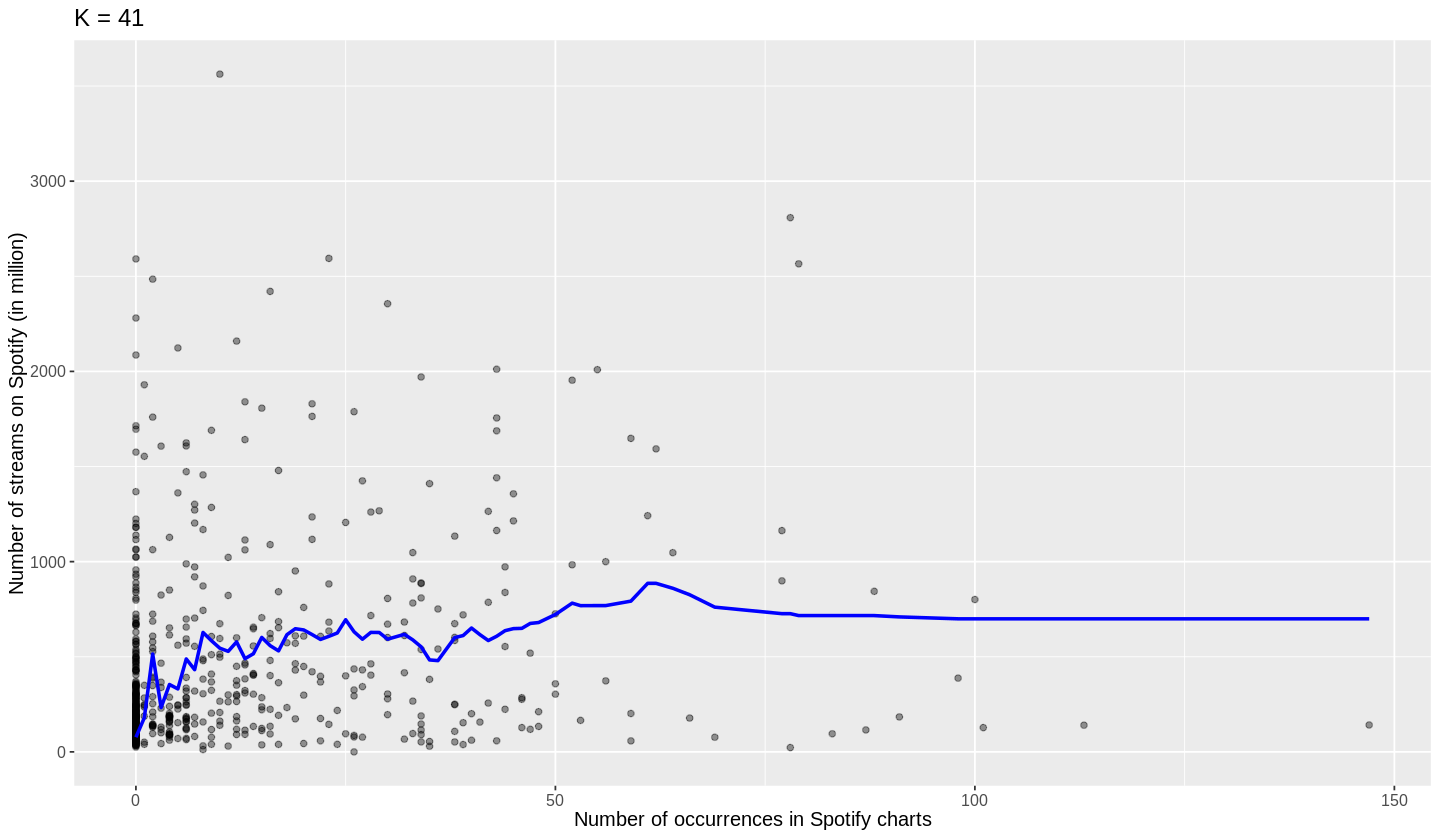

In [31]:
options(repr.plot.height = 7, repr.plot.width = 12)
Spotify_charts_plot <- ggplot(Spotify_charts_preds, aes(x = in_spotify_charts, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Spotify_charts_preds,
            mapping = aes(x = in_spotify_charts, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Number of occurrences in Spotify charts") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_Spotify_charts_min)) +
theme(text = element_text(size = 12))
Spotify_charts_plot

## 2. Number of occurrences in Apple charts

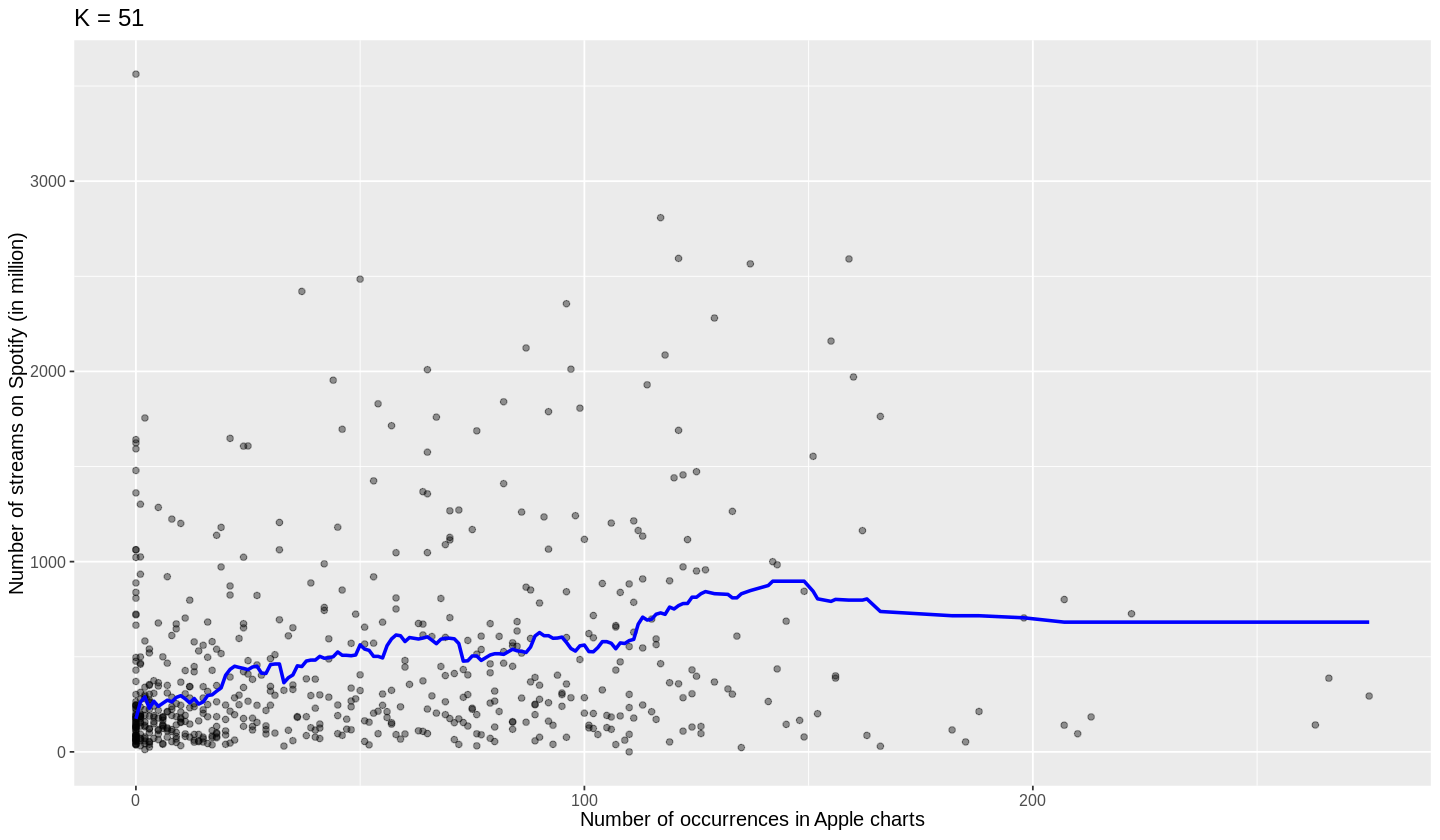

In [32]:
options(repr.plot.height = 7, repr.plot.width = 12)
Apple_charts_plot <- ggplot(Apple_charts_preds, aes(x = in_apple_charts, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Apple_charts_preds,
            mapping = aes(x = in_apple_charts, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Number of occurrences in Apple charts") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_Apple_charts_min)) +
theme(text = element_text(size = 12))
Apple_charts_plot 

## 3. Number of occurrences in Spotify playlists

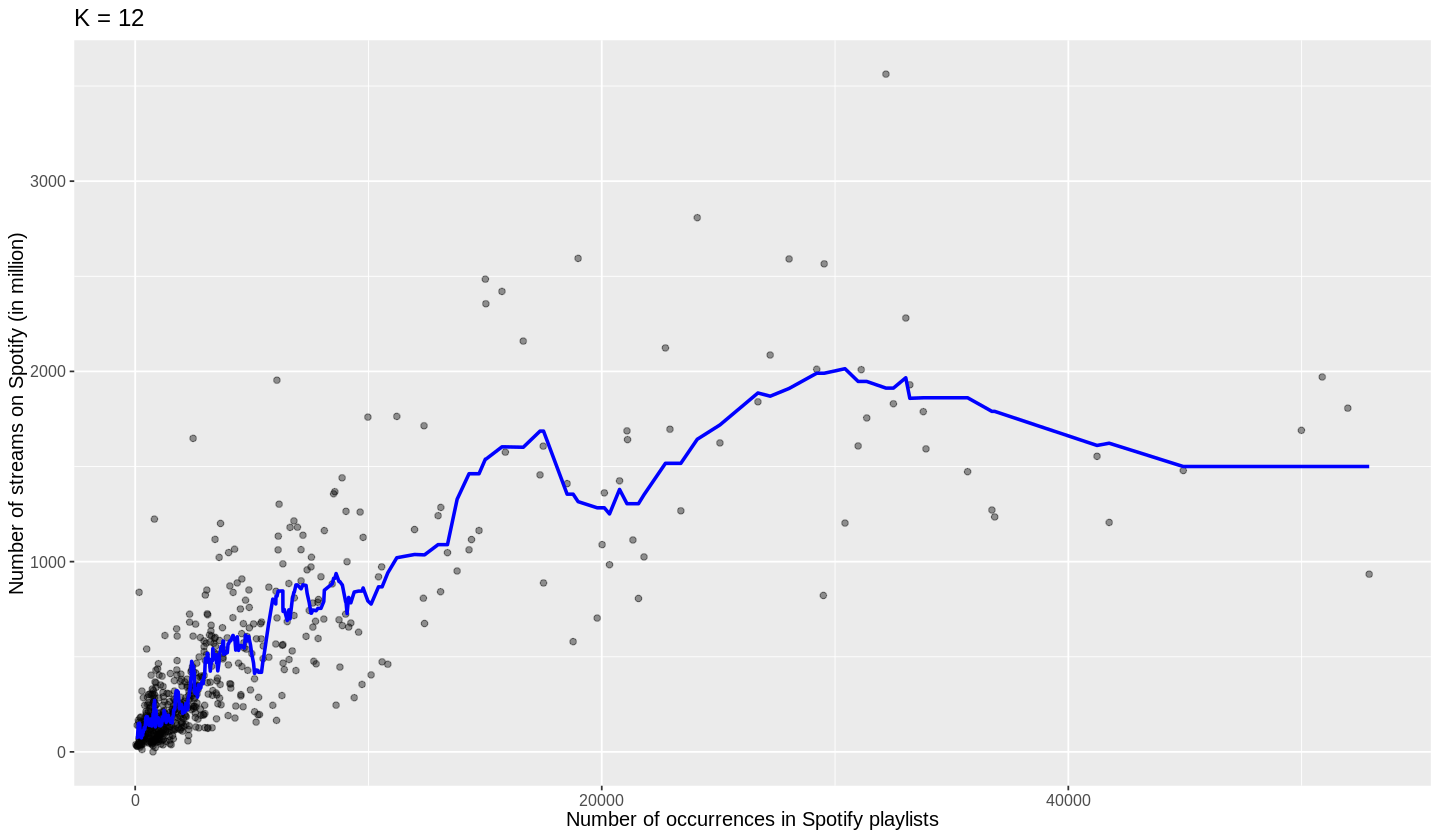

In [33]:
options(repr.plot.height = 7, repr.plot.width = 12)
Spotify_playlists_plot <- ggplot(Spotify_playlists_preds, aes(x = in_spotify_playlists, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Spotify_playlists_preds,
            mapping = aes(x = in_spotify_playlists, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Number of occurrences in Spotify playlists") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_Spotify_playlists_min)) +
theme(text = element_text(size = 12))
Spotify_playlists_plot

## 4. Number of occurrences in Apple playlists

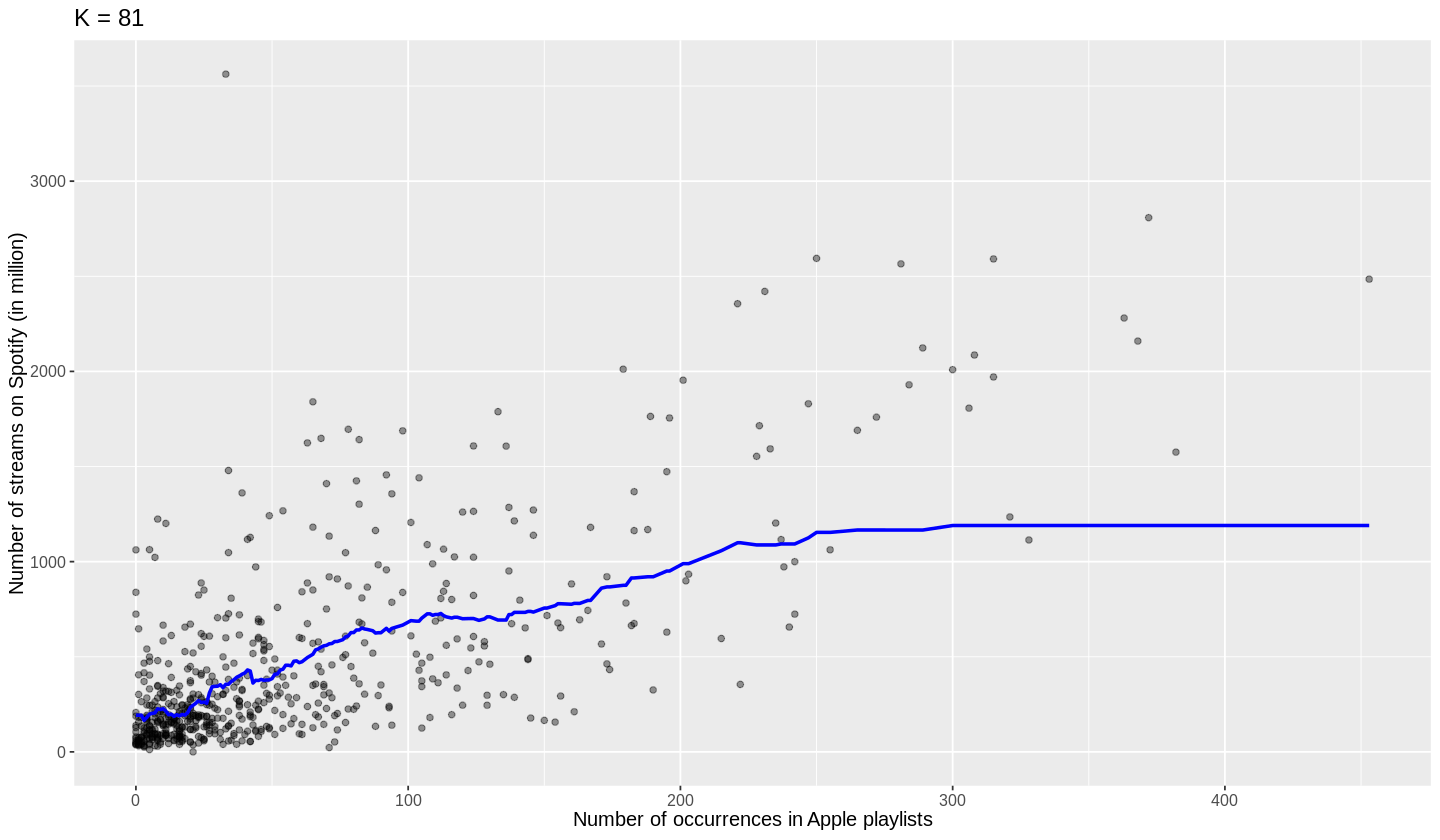

In [36]:
options(repr.plot.height = 7, repr.plot.width = 12)
Apple_playlists_plot <- ggplot(Apple_playlists_preds, aes(x = in_apple_playlists, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Apple_playlists_preds,
            mapping = aes(x = in_apple_playlists, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Number of occurrences in Apple playlists") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_Apple_playlists_min)) +
theme(text = element_text(size = 12))
Apple_playlists_plot 

## 5. Track beats per minute

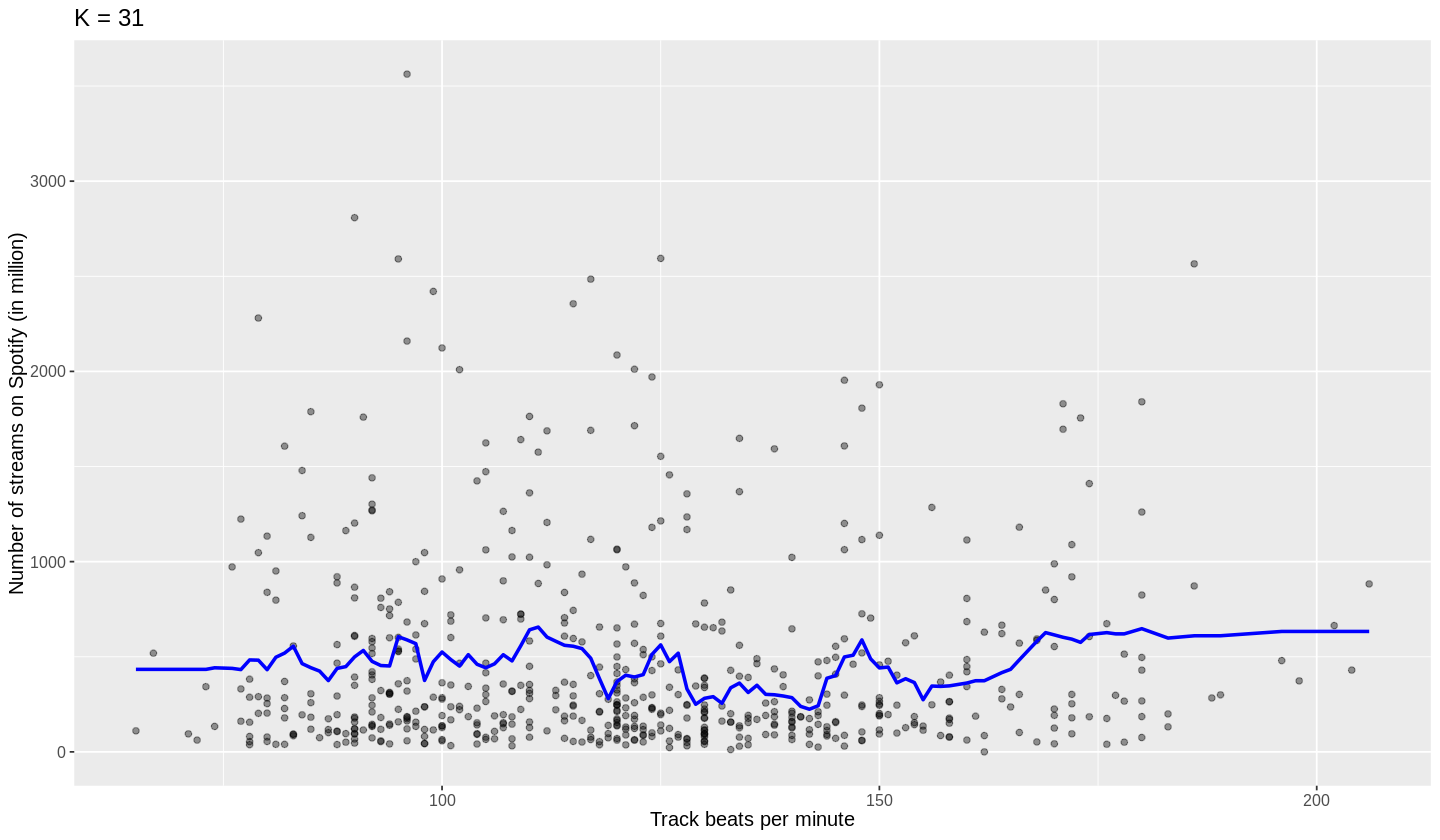

In [37]:
options(repr.plot.height = 7, repr.plot.width = 12)
bpm_plot <- ggplot(bpm_preds, aes(x = bpm, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = bpm_preds,
            mapping = aes(x = bpm, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Track beats per minute") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_bpm_min)) +
theme(text = element_text(size = 12))
bpm_plot 

## 6. Days since release

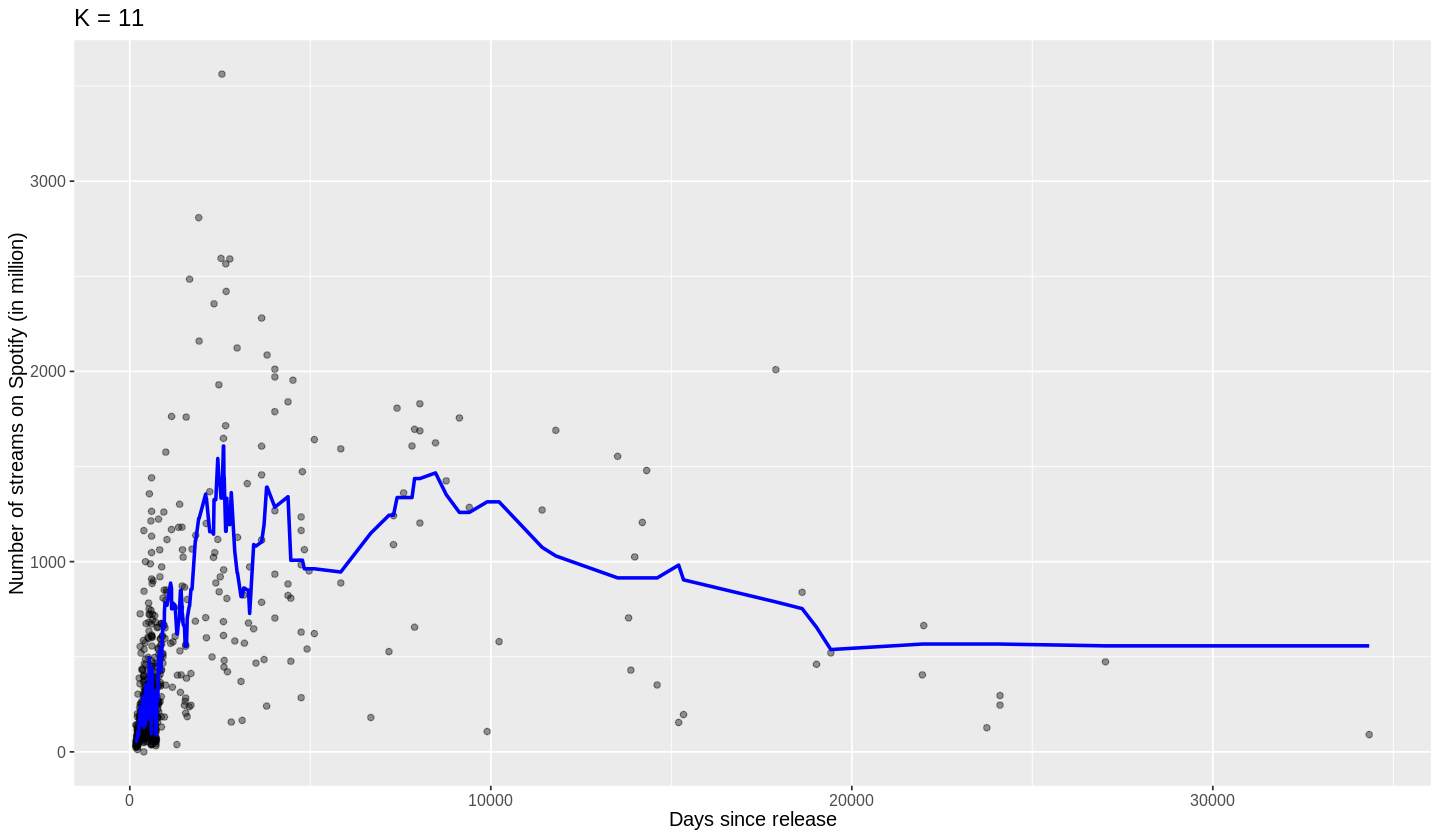

In [38]:
options(repr.plot.height = 7, repr.plot.width = 12)
days_released_plot <- ggplot(days_released_preds, aes(x = days_released, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = days_released_preds,
            mapping = aes(x = days_released, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Days since release") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_days_released_min)) +
theme(text = element_text(size = 12))
days_released_plot

## 7. Danceability (%)

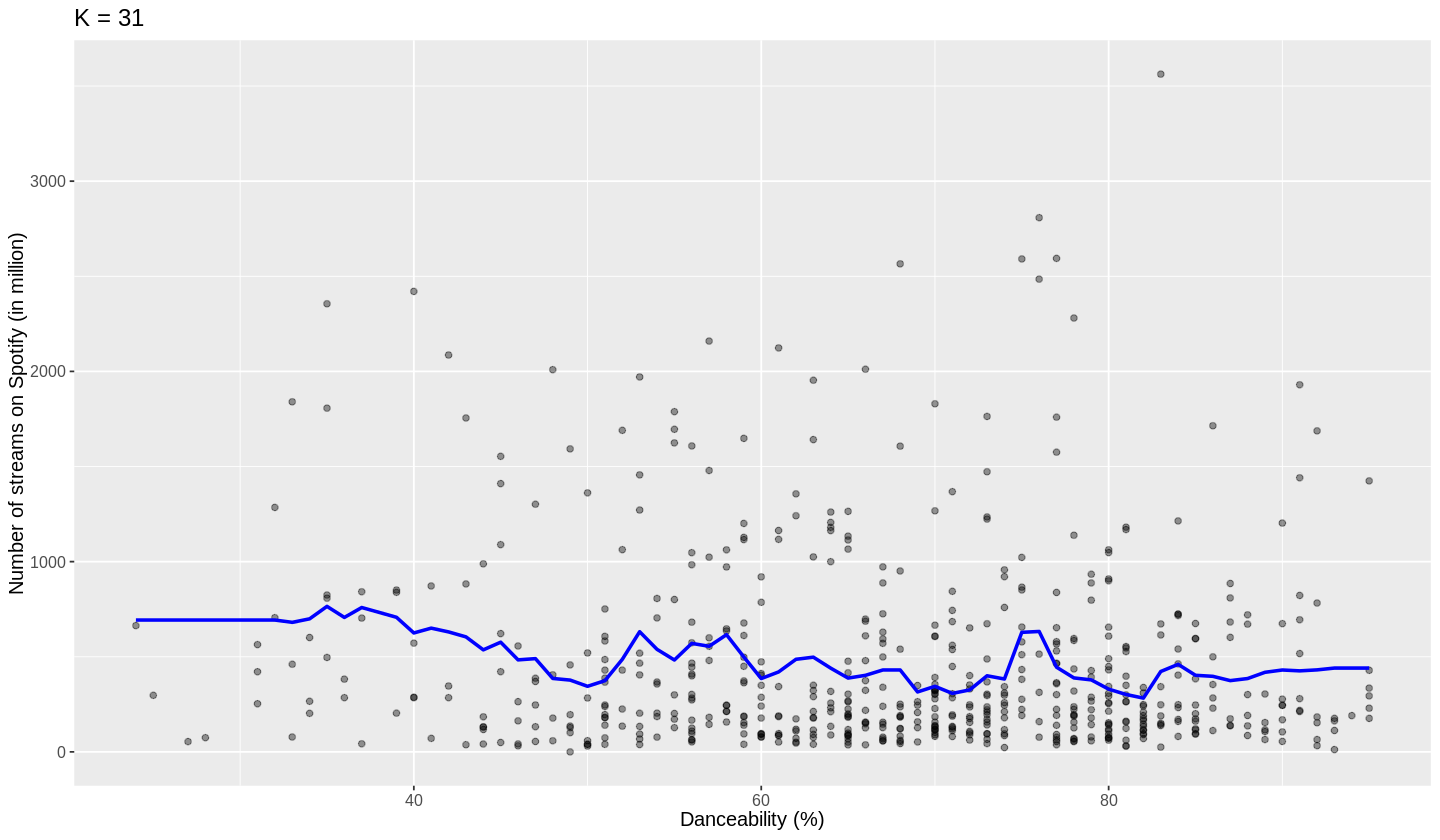

In [39]:
options(repr.plot.height = 7, repr.plot.width = 12)
danceability_plot <- ggplot(danceability_preds, aes(x = danceability_percent, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = danceability_preds,
            mapping = aes(x = danceability_percent, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Danceability (%)") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_danceability_min)) +
theme(text = element_text(size = 12))
danceability_plot

## Try linear regression for Spotify playlists predictor.

In [34]:
lm_spotify_playlists_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lm_recipe <- recipe(streams ~ in_spotify_playlists, data = spotify_train)

lm_fit <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spotify_playlists_spec) |>
    fit(data = spotify_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
         (Intercept)  in_spotify_playlists  
            220.1985                0.0495  


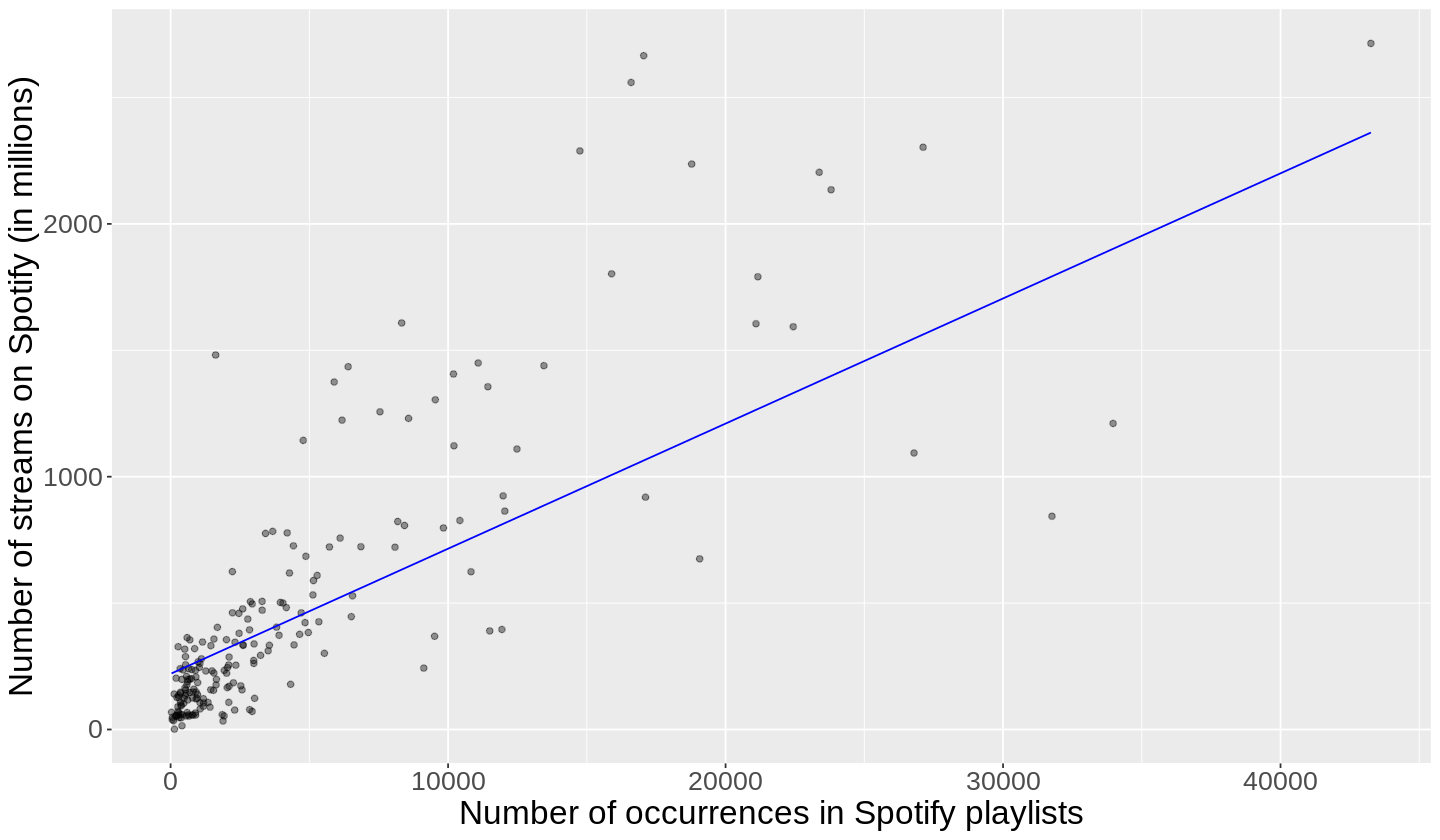

In [35]:
options(repr.plot.height = 7, repr.plot.width = 12)
spotify_playlists_preds <- lm_fit |>
    predict(spotify_train) |>
    bind_cols(spotify_train)

lm_test_result <- lm_fit |>
    predict(spotify_test) |>
    bind_cols(spotify_test)

lm_predictions_spotify_playlists_plot <- lm_test_result |>
    ggplot(aes(x=in_spotify_playlists, y=streams)) +
        geom_point(alpha = 0.4) +
        geom_line(
            mapping = aes(x=in_spotify_playlists, y=.pred),
            color = "blue") +
        xlab("Number of occurrences in Spotify playlists") +
        ylab("Number of streams on Spotify (in millions)") +
        theme(text=element_text(size=20))
lm_predictions_spotify_playlists_plot


# Discussion

summarize what you found\
discuss whether this is what you expected to find\
discuss what impact could such findings have\
discuss what future questions could this lead to

# References

Elgiriyewithana, N. (2023, August 26). *Most streamed Spotify Songs 2023.* Most Streamed Spotify Songs 2023. https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023 \
Interiano, M., Kazemi, K., Wang, L., Yang, J., Yu, Z., & Komarova, N. L. (2018). Musical trends and predictability of success in contemporary songs in and out of the top charts. *Royal Society Open Science*, *5*(5), 171274. https://doi.org/10.1098/rsos.171274 